<a href="https://colab.research.google.com/github/MAZYAFAI/Forex-Prediction-2025/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required libraries for the preprocessing and exploratory data analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading data
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Foreign_Exchange_Rates.xls")
data.head()

Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
0           0  03-01-2000                            1.5172   
1           1  04-01-2000                            1.5239   
2           2  05-01-2000                            1.5267   
3           3  06-01-2000                            1.5291   
4           4  07-01-2000                            1.5272   

  EURO AREA - EURO/US$ NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0               0.9847                              1.9033   
1                 0.97                              1.9238   
2               0.9676                              1.9339   
3               0.9686                              1.9436   
4               0.9714                               1.938   

  UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                    0.6146             1.805   
1                                    0.6109            1.8405   
2                                    0.6092             1.856   
3                                     0.607              1.84   
4                                    0.6104             1.831   

  CANADA - CANADIAN DOLLAR/US$ CHINA - YUAN/US$  \
0                       1.4465           8.2798   
1                       1.4518           8.2799   
2                       1.4518           8.2798   
3                       1.4571           8.2797   
4                       1.4505           8.2794   

  HONG KONG - HONG KONG DOLLAR/US$  ... DENMARK - DANISH KRONE/US$  \
0                           7.7765  ...                      7.329   
1                           7.7775  ...                      7.218   
2                            7.778  ...                      7.208   
3                           7.7785  ...                     7.2125   
4                           7.7783  ...                     7.2285   

  JAPAN - YEN/US$ MALAYSIA - RINGGIT/US$ NORWAY - NORWEGIAN KRONE/US$  \
0           101.7                    3.8                        7.964   
1          103.09                    3.8                        7.934   
2          103.77                    3.8                        7.935   
3          105.19                    3.8                         7.94   
4          105.17                    3.8                        7.966   

  SWEDEN - KRONA/US$ SRI LANKA - SRI LANKAN RUPEE/US$ SWITZERLAND - FRANC/US$  \
0              8.443                             72.3                  1.5808   
1               8.36                            72.65                  1.5565   
2              8.353                            72.95                  1.5526   
3             8.3675                            72.95                   1.554   
4              8.415                            73.15                  1.5623   

  TAIWAN - NEW TAIWAN DOLLAR/US$ THAILAND - BAHT/US$ Unnamed: 24  
0                          31.38               36.97         NaN  
1                           30.6               37.13         NaN  
2                           30.8                37.1         NaN  
3                          31.75               37.62         NaN  
4                          30.85                37.3         NaN  

[5 rows x 25 columns]

In [ ]:
# Loading the data
#data = pd.read_csv("/content/Foreign_Exchange_Rates.xls")
#data.head(5)

In [ ]:
#display the tail of the data
data.tail(60)

Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
5157        5157  09-10-2019                            1.4859   
5158        5158  10-10-2019                            1.4771   
5159        5159  11-10-2019                            1.4697   
5160        5160  14-10-2019                                ND   
5161        5161  15-10-2019                            1.4799   
5162        5162  16-10-2019                            1.4804   
5163        5163  17-10-2019                             1.465   
5164        5164  18-10-2019                            1.4607   
5165        5165  21-10-2019                            1.4562   
5166        5166  22-10-2019                            1.4571   
5167        5167  23-10-2019                            1.4605   
5168        5168  24-10-2019                            1.4669   
5169        5169  25-10-2019                            1.4643   
5170        5170  28-10-2019                            1.4622   
5171        5171  29-10-2019                            1.4573   
5172        5172  30-10-2019                            1.4552   
5173        5173  31-10-2019                            1.4518   
5174        5174  01-11-2019                            1.4463   
5175        5175  04-11-2019                            1.4497   
5176        5176  05-11-2019                             1.451   
5177        5177  06-11-2019                            1.4533   
5178        5178  07-11-2019                            1.4503   
5179        5179  08-11-2019                             1.459   
5180        5180  11-11-2019                                ND   
5181        5181  12-11-2019                            1.4607   
5182        5182  13-11-2019                            1.4639   
5183        5183  14-11-2019                            1.4749   
5184        5184  15-11-2019                            1.4684   
5185        5185  18-11-2019                            1.4663   
5186        5186  19-11-2019                             1.465   
5187        5187  20-11-2019                            1.4712   
5188        5188  21-11-2019                            1.4721   
5189        5189  22-11-2019                            1.4741   
5190        5190  25-11-2019                            1.4771   
5191        5191  26-11-2019                            1.4734   
5192        5192  27-11-2019                            1.4749   
5193        5193  28-11-2019                                ND   
5194        5194  29-11-2019                            1.4789   
5195        5195  02-12-2019                            1.4665   
5196        5196  03-12-2019                            1.4618   
5197        5197  04-12-2019                            1.4596   
5198        5198  05-12-2019                            1.4633   
5199        5199  06-12-2019                            1.4628   
5200        5200  09-12-2019                            1.4637   
5201        5201  10-12-2019                            1.4676   
5202        5202  11-12-2019                            1.4569   
5203        5203  12-12-2019                            1.4501   
5204        5204  13-12-2019                            1.4554   
5205        5205  16-12-2019                             1.452   
5206        5206  17-12-2019                            1.4605   
5207        5207  18-12-2019                             1.459   
5208        5208  19-12-2019                             1.452   
5209        5209  20-12-2019                            1.4489   
5210        5210  23-12-2019                            1.4457   
5211        5211  24-12-2019                            1.4445   
5212        5212  25-12-2019                                ND   
5213        5213  26-12-2019                            1.4411   
5214        5214  27-12-2019                            1.4331   
5215        5215  30-12-2019                            1.4278   
5216        5216  31-12-2019                  

# **EXPLORATORY DATA ANALYSIS, Data Cleaning and Preprocessing**

In [ ]:
#check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 5217 non-null   int64  
 1   Time Serie                                 5217 non-null   object 
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object 
 3   EURO AREA - EURO/US$                       5217 non-null   object 
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object 
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object 
 6   BRAZIL - REAL/US$                          5217 non-null   object 
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object 
 8   CHINA - YUAN/US$                           5217 non-null   object 
 9   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object 
 10  INDIA - INDIAN RUPEE/US$

In [ ]:
# checking for null values
data.isnull().sum()

Unnamed: 0                                      0
Time Serie                                      0
AUSTRALIA - AUSTRALIAN DOLLAR/US$               0
EURO AREA - EURO/US$                            0
NEW ZEALAND - NEW ZELAND DOLLAR/US$             0
UNITED KINGDOM - UNITED KINGDOM POUND/US$       0
BRAZIL - REAL/US$                               0
CANADA - CANADIAN DOLLAR/US$                    0
CHINA - YUAN/US$                                0
HONG KONG - HONG KONG DOLLAR/US$                0
INDIA - INDIAN RUPEE/US$                        0
KOREA - WON/US$                                 0
MEXICO - MEXICAN PESO/US$                       0
SOUTH AFRICA - RAND/US$                         0
SINGAPORE - SINGAPORE DOLLAR/US$                0
DENMARK - DANISH KRONE/US$                      0
JAPAN - YEN/US$                                 0
MALAYSIA - RINGGIT/US$                          0
NORWAY - NORWEGIAN KRONE/US$                    0
SWEDEN - KRONA/US$                              0
SRI LANKA - SRI LANKAN RUPEE/US$                0
SWITZERLAND - FRANC/US$                         0
TAIWAN - NEW TAIWAN DOLLAR/US$                  0
THAILAND - BAHT/US$                             0
Unnamed: 24                                  5217
dtype: int64

In [ ]:
#Drop the Unnnamed: 24 column AND Unnamed: 0 COLUMNS from the dataframe
df = data.drop(['Unnamed: 24', 'Unnamed: 0'], axis =1)

In [ ]:
#confirm that these column has been
df.head()

Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$ EURO AREA - EURO/US$  \
0  03-01-2000                            1.5172               0.9847   
1  04-01-2000                            1.5239                 0.97   
2  05-01-2000                            1.5267               0.9676   
3  06-01-2000                            1.5291               0.9686   
4  07-01-2000                            1.5272               0.9714   

  NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0                              1.9033   
1                              1.9238   
2                              1.9339   
3                              1.9436   
4                               1.938   

  UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                    0.6146             1.805   
1                                    0.6109            1.8405   
2                                    0.6092             1.856   
3                                     0.607              1.84   
4                                    0.6104             1.831   

  CANADA - CANADIAN DOLLAR/US$ CHINA - YUAN/US$  \
0                       1.4465           8.2798   
1                       1.4518           8.2799   
2                       1.4518           8.2798   
3                       1.4571           8.2797   
4                       1.4505           8.2794   

  HONG KONG - HONG KONG DOLLAR/US$ INDIA - INDIAN RUPEE/US$  ...  \
0                           7.7765                    43.55  ...   
1                           7.7775                    43.55  ...   
2                            7.778                    43.55  ...   
3                           7.7785                    43.55  ...   
4                           7.7783                    43.55  ...   

  SINGAPORE - SINGAPORE DOLLAR/US$ DENMARK - DANISH KRONE/US$ JAPAN - YEN/US$  \
0                           1.6563                      7.329           101.7   
1                           1.6535                      7.218          103.09   
2                            1.656                      7.208          103.77   
3                           1.6655                     7.2125          105.19   
4                           1.6625                     7.2285          105.17   

  MALAYSIA - RINGGIT/US$ NORWAY - NORWEGIAN KRONE/US$ SWEDEN - KRONA/US$  \
0                    3.8                        7.964              8.443   
1                    3.8                        7.934               8.36   
2                    3.8                        7.935              8.353   
3                    3.8                         7.94             8.3675   
4                    3.8                        7.966              8.415   

  SRI LANKA - SRI LANKAN RUPEE/US$ SWITZERLAND - FRANC/US$  \
0                             72.3                  1.5808   
1                            72.65                  1.5565   
2                            72.95                  1.5526   
3                            72.95                   1.554   
4                            73.15                  1.5623   

  TAIWAN - NEW TAIWAN DOLLAR/US$ THAILAND - BAHT/US$  
0                          31.38               36.97  
1                           30.6               37.13  
2                           30.8                37.1  
3                          31.75               37.62  
4                          30.85                37.3  

[5 rows x 23 columns]

In [ ]:
# For each of the columns in the dataframe, we are expecting float in the currency column and datetime in the Time Serie column lets check the unique data types in columns
for col in df.columns:
  print(col, df[col].apply(type).unique())

Time Serie [<class 'str'>]
AUSTRALIA - AUSTRALIAN DOLLAR/US$ [<class 'str'>]
EURO AREA - EURO/US$ [<class 'str'>]
NEW ZEALAND - NEW ZELAND DOLLAR/US$ [<class 'str'>]
UNITED KINGDOM - UNITED KINGDOM POUND/US$ [<class 'str'>]
BRAZIL - REAL/US$ [<class 'str'>]
CANADA - CANADIAN DOLLAR/US$ [<class 'str'>]
CHINA - YUAN/US$ [<class 'str'>]
HONG KONG - HONG KONG DOLLAR/US$ [<class 'str'>]
INDIA - INDIAN RUPEE/US$ [<class 'str'>]
KOREA - WON/US$ [<class 'str'>]
MEXICO - MEXICAN PESO/US$ [<class 'str'>]
SOUTH AFRICA - RAND/US$ [<class 'str'>]
SINGAPORE - SINGAPORE DOLLAR/US$ [<class 'str'>]
DENMARK - DANISH KRONE/US$ [<class 'str'>]
JAPAN - YEN/US$ [<class 'str'>]
MALAYSIA - RINGGIT/US$ [<class 'str'>]
NORWAY - NORWEGIAN KRONE/US$ [<class 'str'>]
SWEDEN - KRONA/US$ [<class 'str'>]
SRI LANKA - SRI LANKAN RUPEE/US$ [<class 'str'>]
SWITZERLAND - FRANC/US$ [<class 'str'>]
TAIWAN - NEW TAIWAN DOLLAR/US$ [<class 'str'>]
THAILAND - BAHT/US$ [<class 'str'>]


In [ ]:
#convert the Time Serie column to datetime

df['Time Serie'] = pd.to_datetime(data['Time Serie'], format = '%d-%m-%Y')

In [ ]:
# Count rows with 'ND'
rows_with_nd = df[df.isin(['ND']).any(axis=1)]
count_dropped_rows = len(rows_with_nd)


In [ ]:
print (count_dropped_rows)

202


In [ ]:
# Drop rows with 'ND'
df_cleaned = df[~df.isin(['ND']).any(axis=1)]

print("Number of dropped rows:", count_dropped_rows)

Number of dropped rows: 202


In [ ]:
#converting the currency columns to type float
columns_to_modify = df_cleaned.columns[1:]  # Exclude the first column

# Applying the operation only to the selected columns
for col in columns_to_modify:
    df_cleaned.loc[:, col] = df_cleaned[col].astype(float)

In [ ]:
#confirming that the columns now have the expected datatypes

for col in df_cleaned.columns:
  print(col, df_cleaned[col].apply(type).unique())

Time Serie [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
AUSTRALIA - AUSTRALIAN DOLLAR/US$ [<class 'float'>]
EURO AREA - EURO/US$ [<class 'float'>]
NEW ZEALAND - NEW ZELAND DOLLAR/US$ [<class 'float'>]
UNITED KINGDOM - UNITED KINGDOM POUND/US$ [<class 'float'>]
BRAZIL - REAL/US$ [<class 'float'>]
CANADA - CANADIAN DOLLAR/US$ [<class 'float'>]
CHINA - YUAN/US$ [<class 'float'>]
HONG KONG - HONG KONG DOLLAR/US$ [<class 'float'>]
INDIA - INDIAN RUPEE/US$ [<class 'float'>]
KOREA - WON/US$ [<class 'float'>]
MEXICO - MEXICAN PESO/US$ [<class 'float'>]
SOUTH AFRICA - RAND/US$ [<class 'float'>]
SINGAPORE - SINGAPORE DOLLAR/US$ [<class 'float'>]
DENMARK - DANISH KRONE/US$ [<class 'float'>]
JAPAN - YEN/US$ [<class 'float'>]
MALAYSIA - RINGGIT/US$ [<class 'float'>]
NORWAY - NORWEGIAN KRONE/US$ [<class 'float'>]
SWEDEN - KRONA/US$ [<class 'float'>]
SRI LANKA - SRI LANKAN RUPEE/US$ [<class 'float'>]
SWITZERLAND - FRANC/US$ [<class 'float'>]
TAIWAN - NEW TAIWAN DOLLAR/US$ [<class 'float'>]
TH

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5015 entries, 0 to 5216
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time Serie                                 5015 non-null   datetime64[ns]
 1   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5015 non-null   object        
 2   EURO AREA - EURO/US$                       5015 non-null   object        
 3   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5015 non-null   object        
 4   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5015 non-null   object        
 5   BRAZIL - REAL/US$                          5015 non-null   object        
 6   CANADA - CANADIAN DOLLAR/US$               5015 non-null   object        
 7   CHINA - YUAN/US$                           5015 non-null   object        
 8   HONG KONG - HONG KONG DOLLAR/US$           5015 non-null   object        
 9   INDIA - INDIAN RUPEE/US$

In [ ]:
df_cleaned.set_index('Time Serie', inplace=True)

In [ ]:
# Create a list of all the currency columns except columns Unnamed: 0	 and Time Serie
currency_columns = [col for col in df_cleaned.columns if col not in ['Unnamed: 0', 'Timerie']]

currency_columns


['AUSTRALIA - AUSTRALIAN DOLLAR/US$',
 'EURO AREA - EURO/US$',
 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
 'BRAZIL - REAL/US$',
 'CANADA - CANADIAN DOLLAR/US$',
 'CHINA - YUAN/US$',
 'HONG KONG - HONG KONG DOLLAR/US$',
 'INDIA - INDIAN RUPEE/US$',
 'KOREA - WON/US$',
 'MEXICO - MEXICAN PESO/US$',
 'SOUTH AFRICA - RAND/US$',
 'SINGAPORE - SINGAPORE DOLLAR/US$',
 'DENMARK - DANISH KRONE/US$',
 'JAPAN - YEN/US$',
 'MALAYSIA - RINGGIT/US$',
 'NORWAY - NORWEGIAN KRONE/US$',
 'SWEDEN - KRONA/US$',
 'SRI LANKA - SRI LANKAN RUPEE/US$',
 'SWITZERLAND - FRANC/US$',
 'TAIWAN - NEW TAIWAN DOLLAR/US$',
 'THAILAND - BAHT/US$']

In [ ]:
# Convert data type in currency columns from type str to float
for col in currency_columns:
    df_cleaned[col] = df_cleaned[col].astype(float)


/tmp/ipython-input-24-1763156264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(float)
/tmp/ipython-input-24-1763156264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(float)
/tmp/ipython-input-24-1763156264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
df_cleaned.head()

AUSTRALIA - AUSTRALIAN DOLLAR/US$  EURO AREA - EURO/US$  \
Time Serie                                                            
2000-01-03                             1.5172                0.9847   
2000-01-04                             1.5239                0.9700   
2000-01-05                             1.5267                0.9676   
2000-01-06                             1.5291                0.9686   
2000-01-07                             1.5272                0.9714   

            NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
Time Serie                                        
2000-01-03                               1.9033   
2000-01-04                               1.9238   
2000-01-05                               1.9339   
2000-01-06                               1.9436   
2000-01-07                               1.9380   

            UNITED KINGDOM - UNITED KINGDOM POUND/US$  BRAZIL - REAL/US$  \
Time Serie                                                                 
2000-01-03                                     0.6146             1.8050   
2000-01-04                                     0.6109             1.8405   
2000-01-05                                     0.6092             1.8560   
2000-01-06                                     0.6070             1.8400   
2000-01-07                                     0.6104             1.8310   

            CANADA - CANADIAN DOLLAR/US$  CHINA - YUAN/US$  \
Time Serie                                                   
2000-01-03                        1.4465            8.2798   
2000-01-04                        1.4518            8.2799   
2000-01-05                        1.4518            8.2798   
2000-01-06                        1.4571            8.2797   
2000-01-07                        1.4505            8.2794   

            HONG KONG - HONG KONG DOLLAR/US$  INDIA - INDIAN RUPEE/US$  \
Time Serie                                                               
2000-01-03                            7.7765                     43.55   
2000-01-04                            7.7775                     43.55   
2000-01-05                            7.7780                     43.55   
2000-01-06                            7.7785                     43.55   
2000-01-07                            7.7783                     43.55   

            KOREA - WON/US$  ...  SINGAPORE - SINGAPORE DOLLAR/US$  \
Time Serie                   ...                                     
2000-01-03           1128.0  ...                            1.6563   
2000-01-04           1122.5  ...                            1.6535   
2000-01-05           1135.0  ...                            1.6560   
2000-01-06           1146.5  ...                            1.6655   
2000-01-07           1138.0  ...                            1.6625   

            DENMARK - DANISH KRONE/US$  JAPAN - YEN/US$  \
Time Serie                                                
2000-01-03                      7.3290           101.70   
2000-01-04                      7.2180           103.09   
2000-01-05                      7.2080           103.77   
2000-01-06                      7.2125           105.19   
2000-01-07                      7.2285           105.17   

            MALAYSIA - RINGGIT/US$  NORWAY - NORWEGIAN KRONE/US$  \
Time Serie                                                         
2000-01-03                     3.8                         7.964   
2000-01-04                     3.8                         7.934   
2000-01-05                     3.8                         7.935   
2000-01-06                     3.8                         7.940   
2000-01-07                     3.8                         7.966   

            SWEDEN - KRONA/US$  SRI LANKA - SRI LANKAN RUPEE/US$  \
Time Serie                                                         
2000-01-03              8.4430                             72.30   
2000-01-04              8.3600                             72.65   
2000-01-05     

In [ ]:
df_cleaned.dtypes

AUSTRALIA - AUSTRALIAN DOLLAR/US$            float64
EURO AREA - EURO/US$                         float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$          float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$    float64
BRAZIL - REAL/US$                            float64
CANADA - CANADIAN DOLLAR/US$                 float64
CHINA - YUAN/US$                             float64
HONG KONG - HONG KONG DOLLAR/US$             float64
INDIA - INDIAN RUPEE/US$                     float64
KOREA - WON/US$                              float64
MEXICO - MEXICAN PESO/US$                    float64
SOUTH AFRICA - RAND/US$                      float64
SINGAPORE - SINGAPORE DOLLAR/US$             float64
DENMARK - DANISH KRONE/US$                   float64
JAPAN - YEN/US$                              float64
MALAYSIA - RINGGIT/US$                       float64
NORWAY - NORWEGIAN KRONE/US$                 float64
SWEDEN - KRONA/US$                           float64
SRI LANKA - SRI LANKAN RUPEE/US$             float64
SWITZERLAND - FRANC/US$                      float64
TAIWAN - NEW TAIWAN DOLLAR/US$               float64
THAILAND - BAHT/US$                          float64
dtype: object

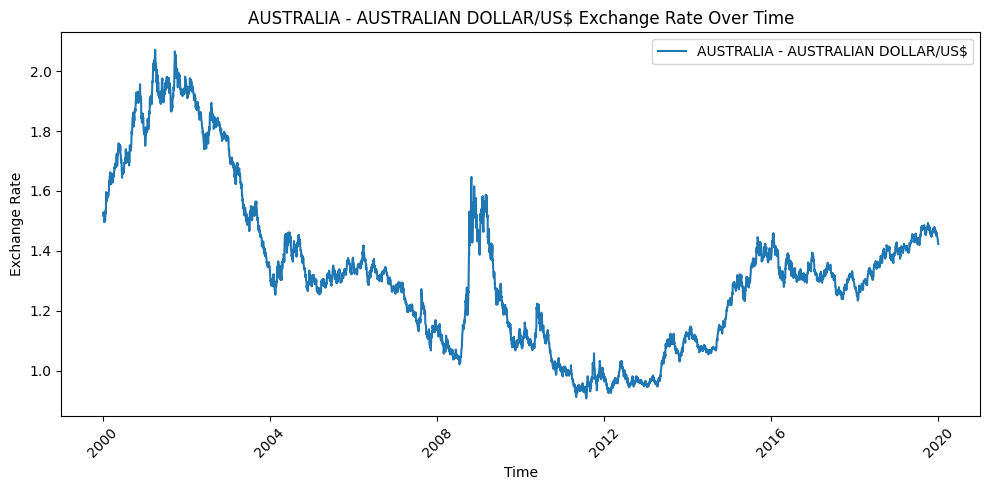

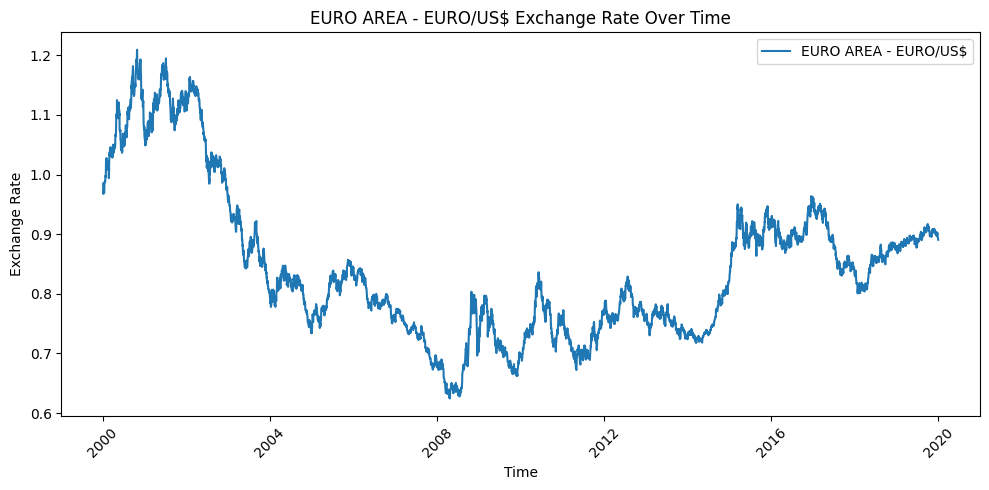

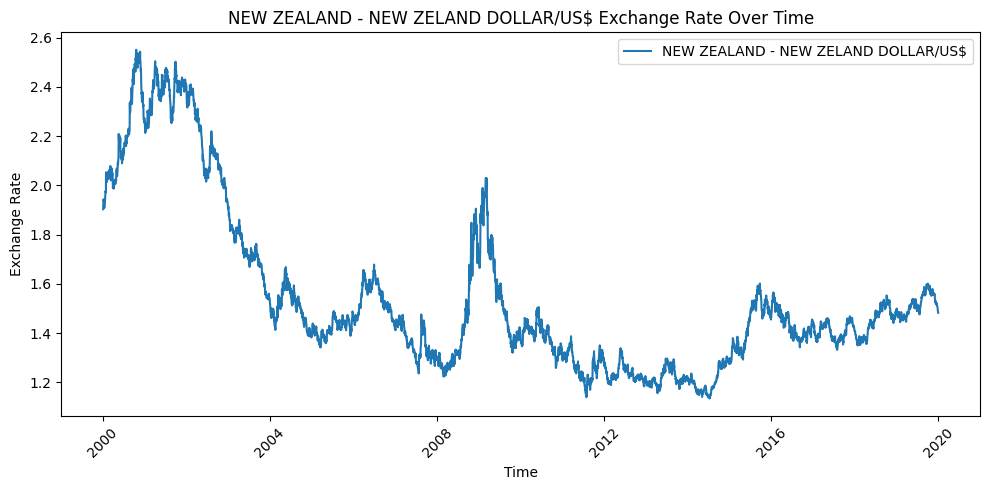

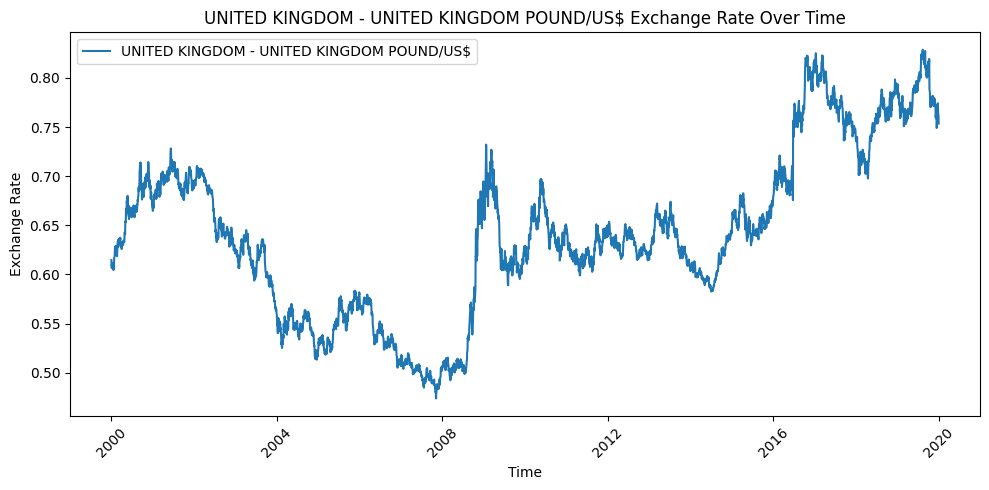

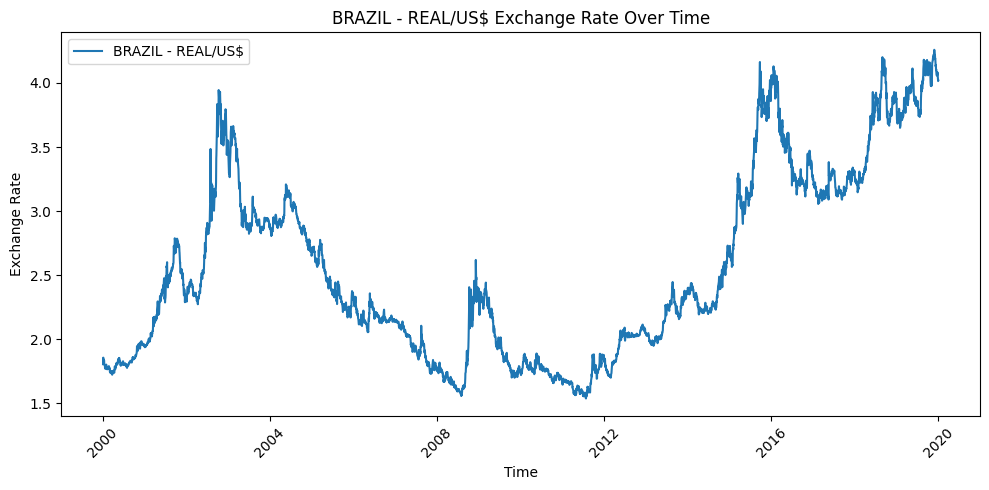

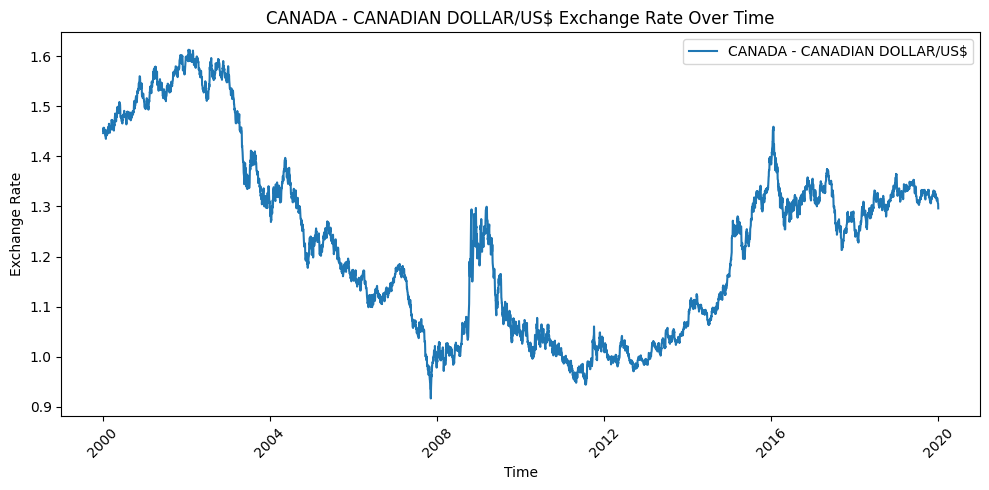

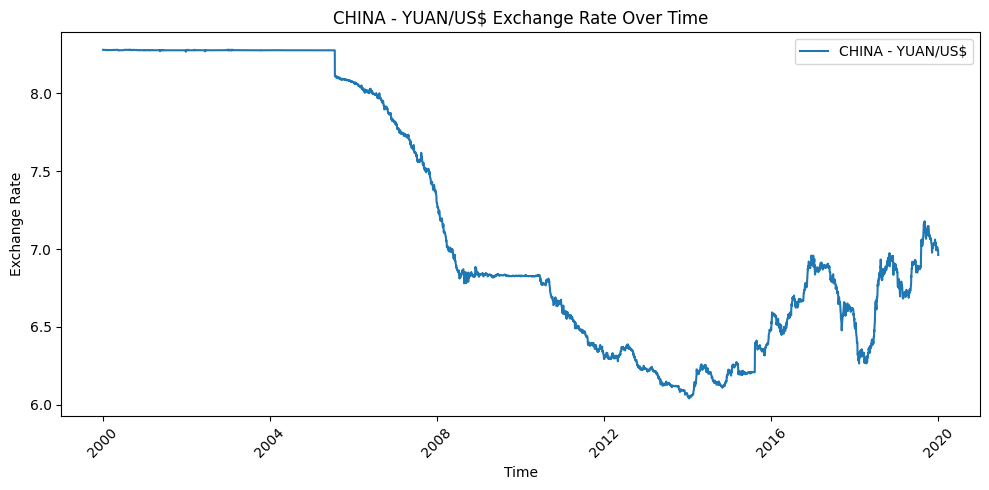

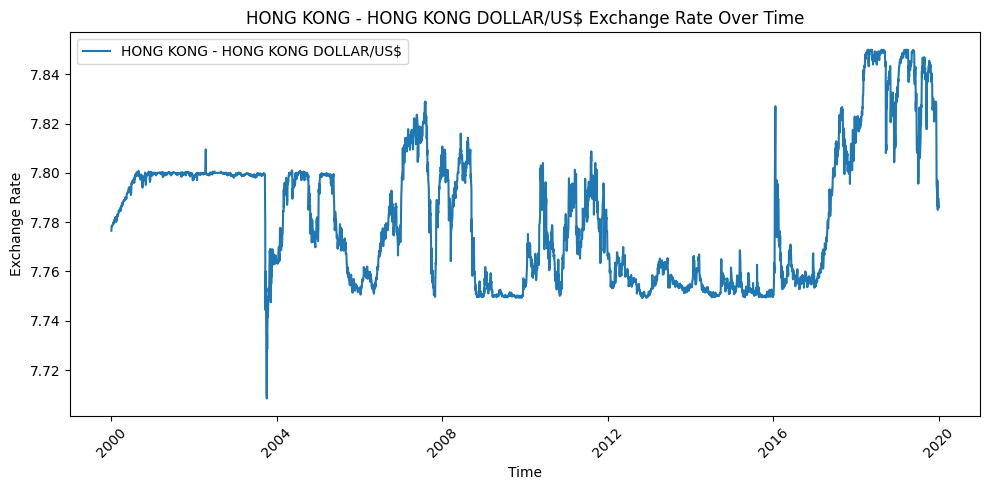

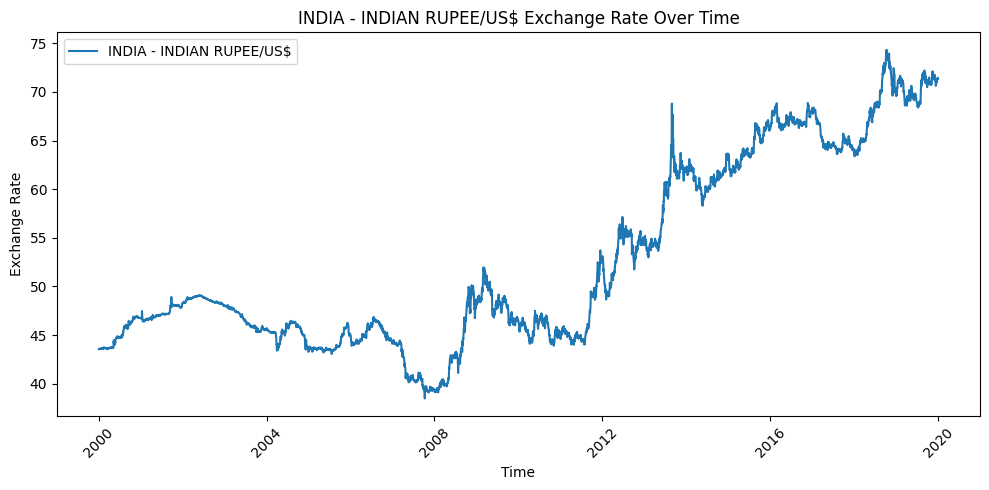

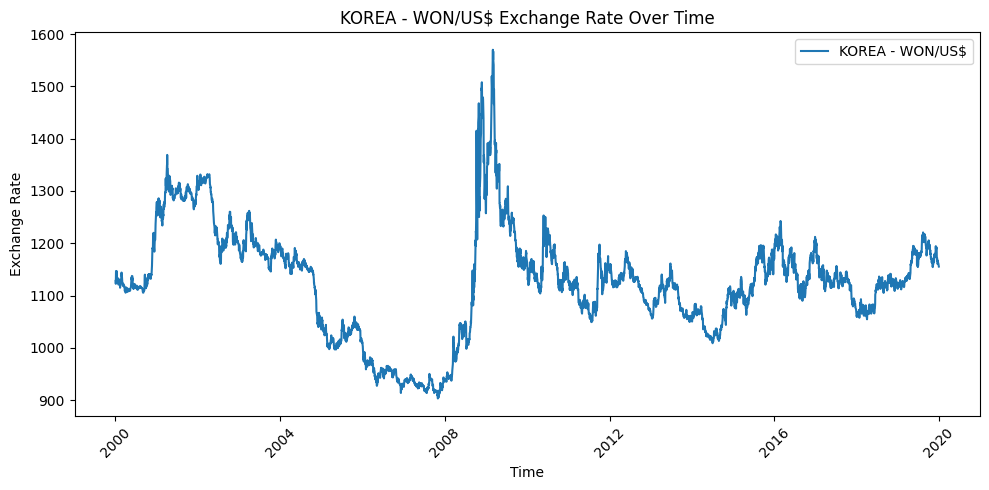

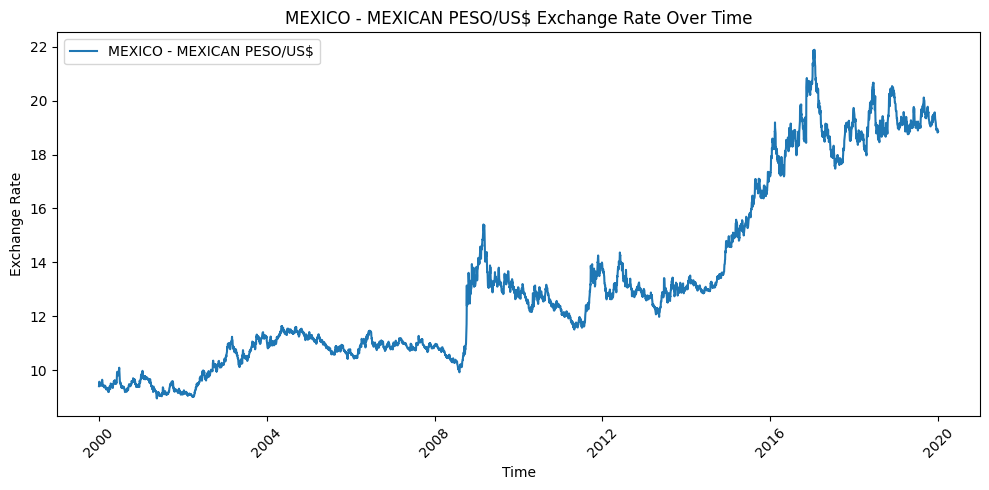

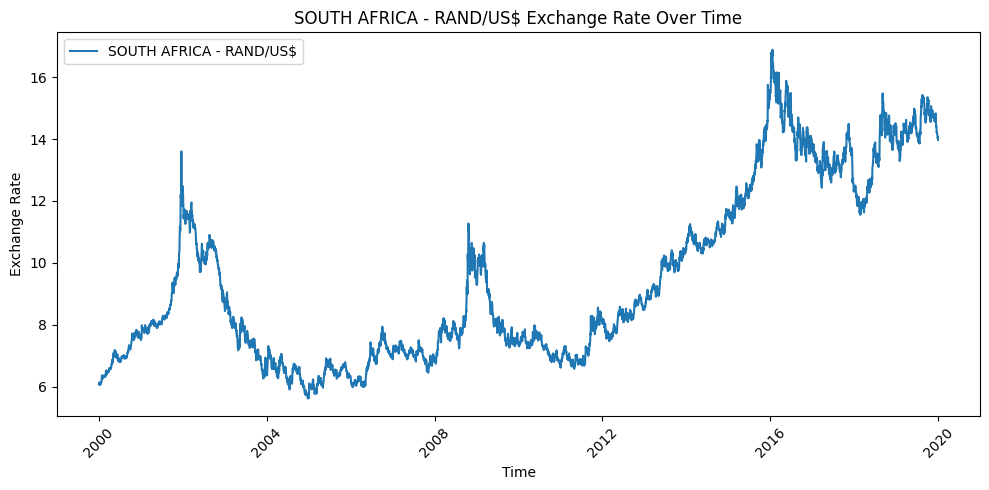

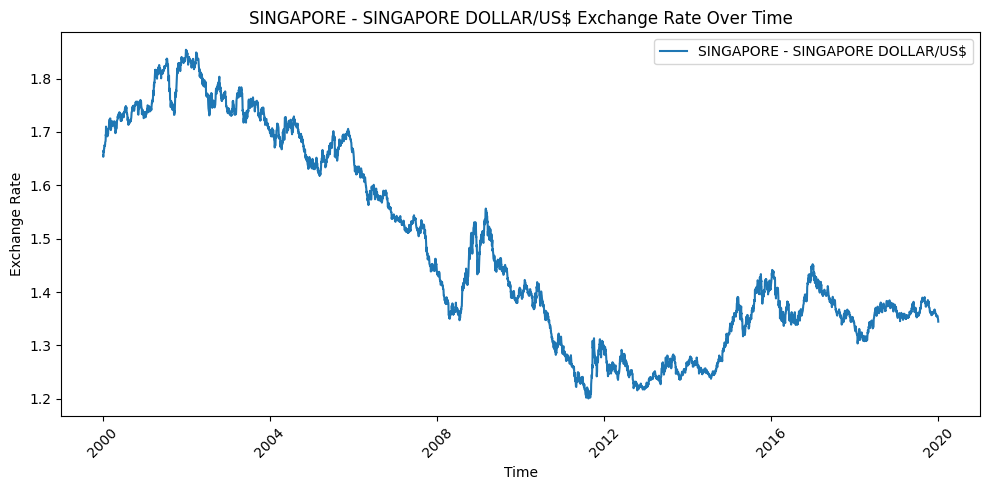

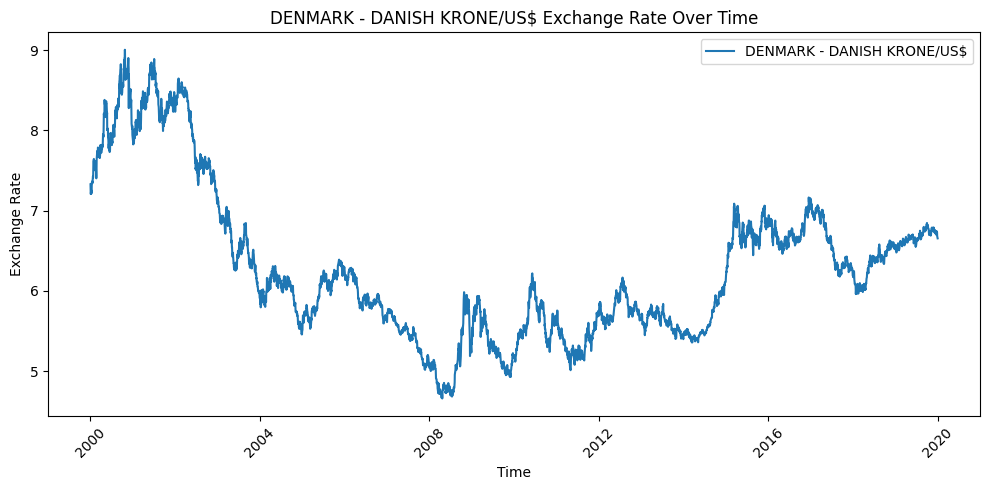

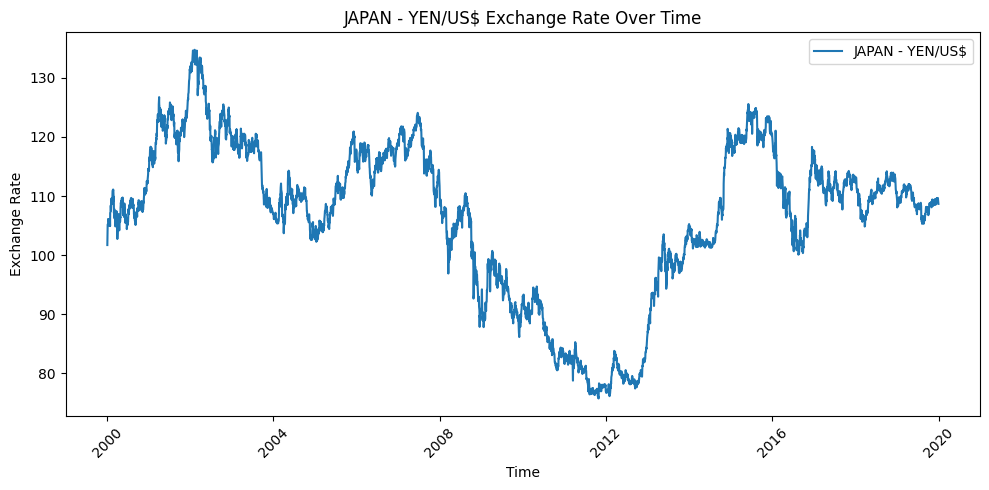

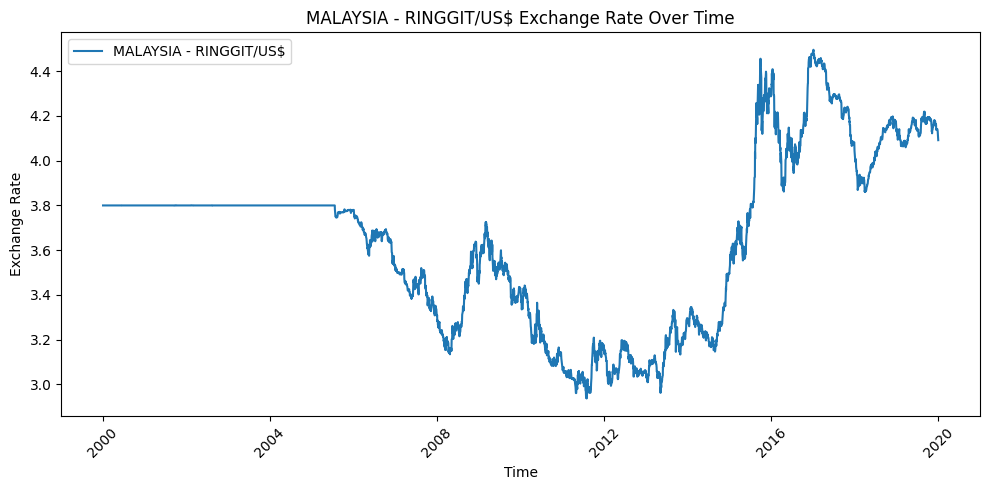

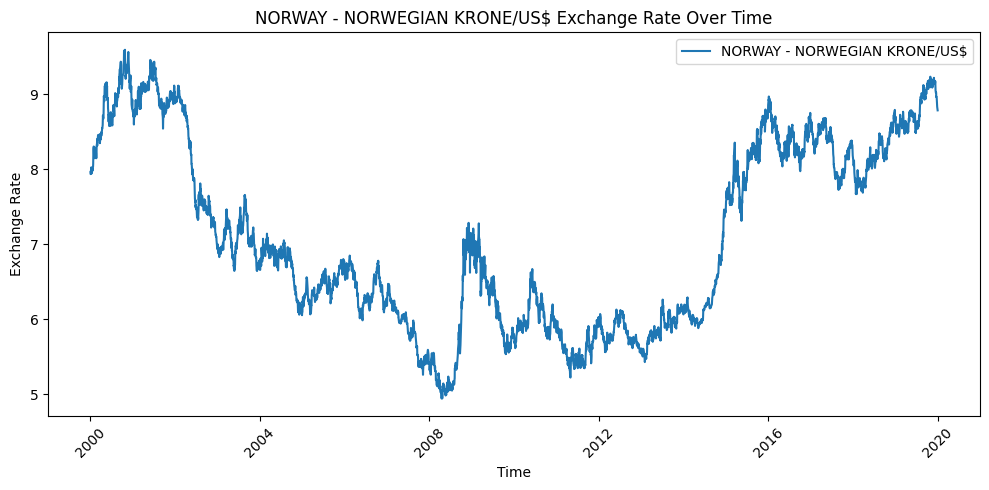

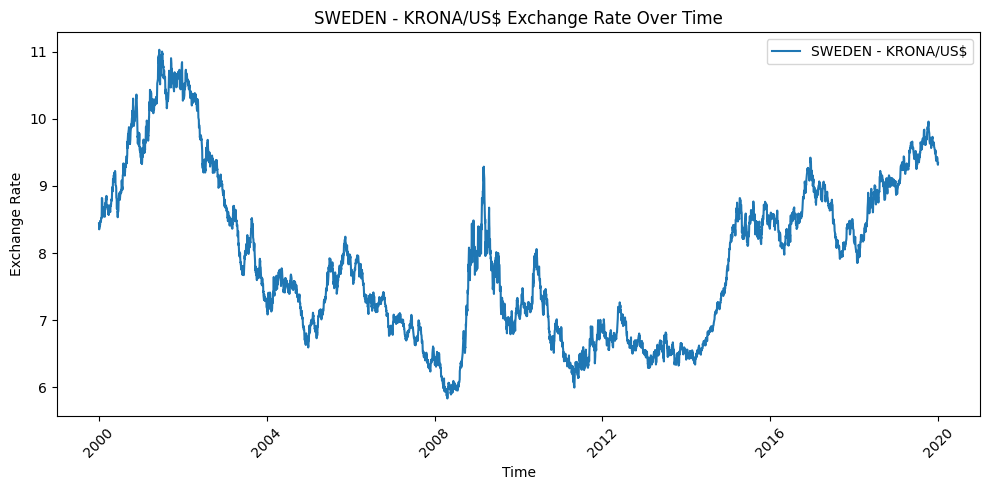

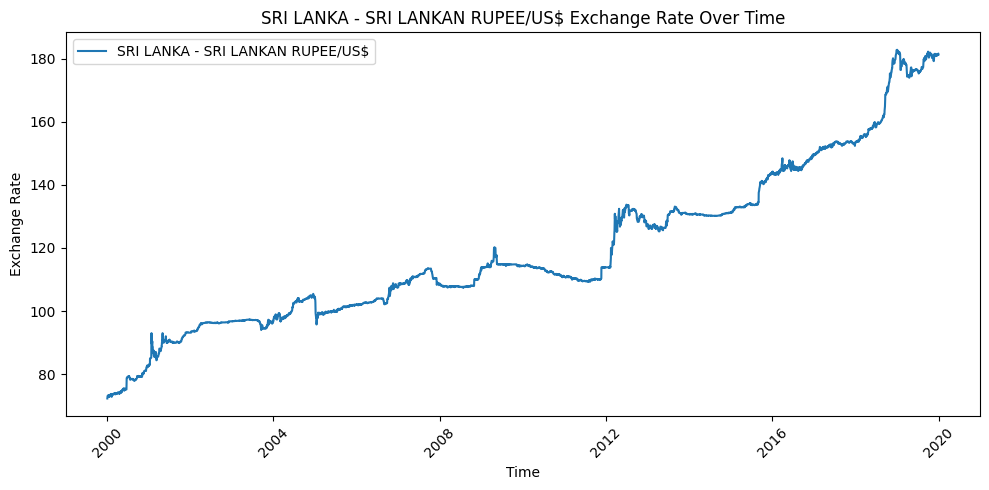

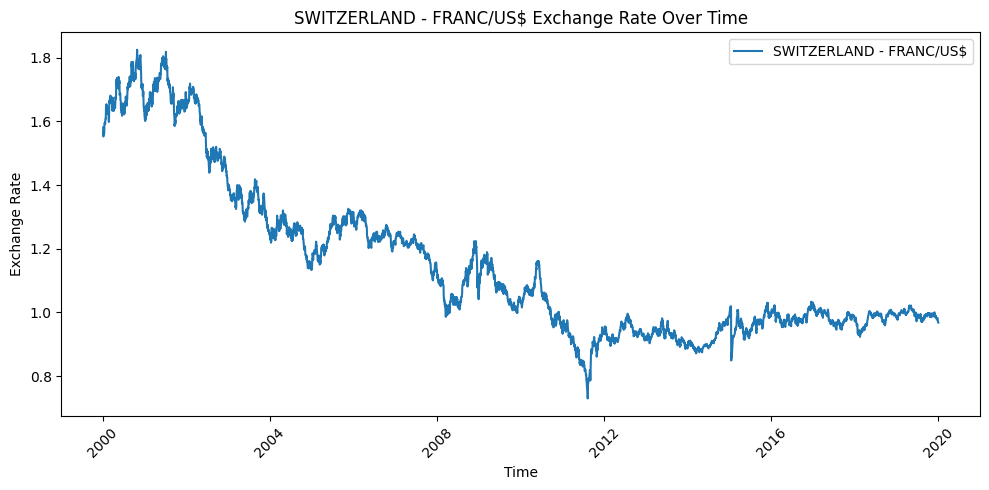

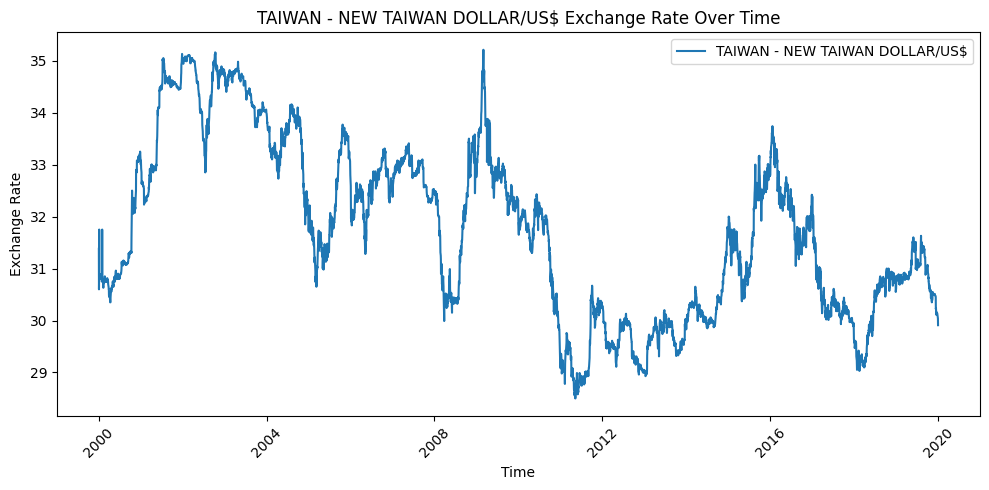

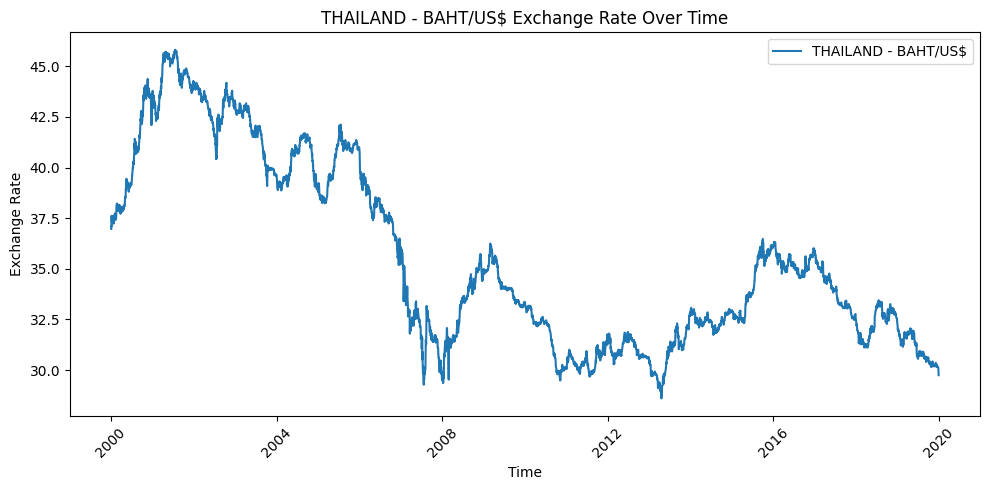

In [ ]:
# Generate separate plots for each currency to view their exchange rates
for column in df_cleaned.columns:  # Iterate over all columns except index
    plt.figure(figsize=(10, 5))
     # Using datetime index for x-axis
    plt.plot(df_cleaned.index, df_cleaned[column], label=column)
    plt.title(f'{column} Exchange Rate Over Time')
    plt.xlabel('Time')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-28-3204853755.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[column])
/tmp/ipython-input-28-3204853755.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[column])
/tmp/ipython-input-28-3204853755.py:5: UserWarning: 

`distplot` is a deprecated funct

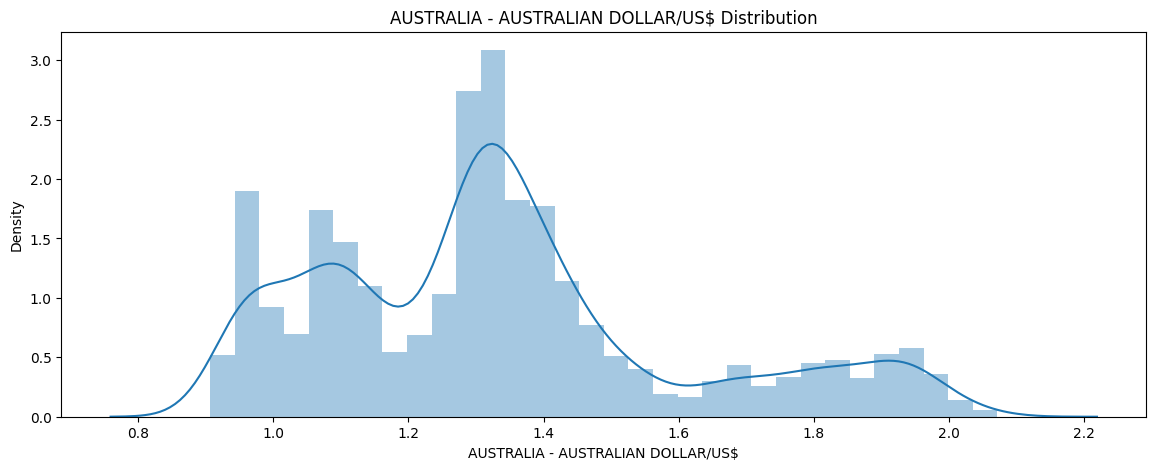

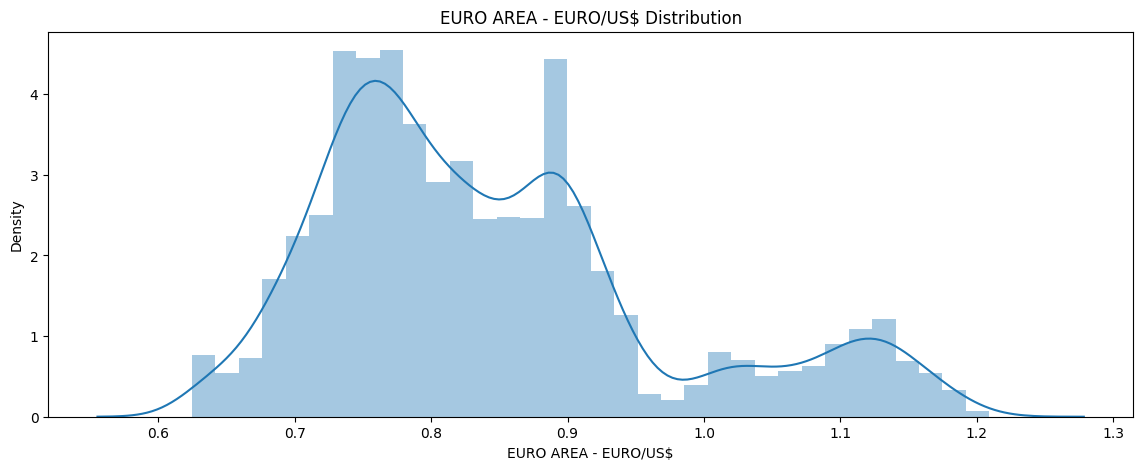

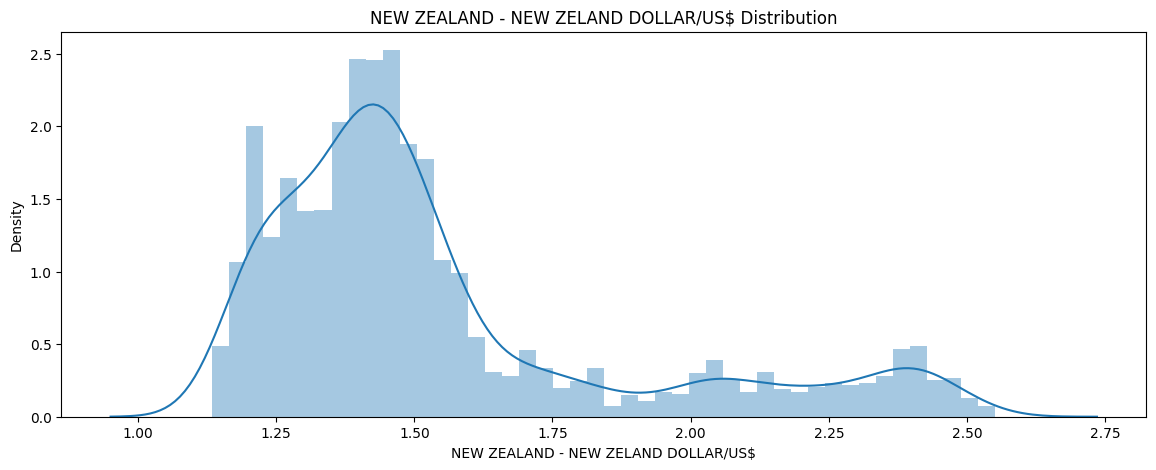

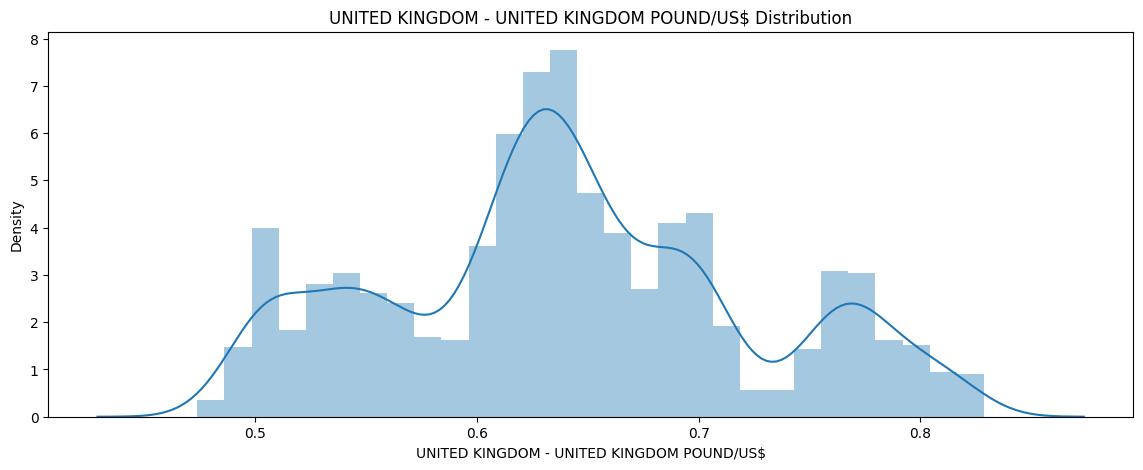

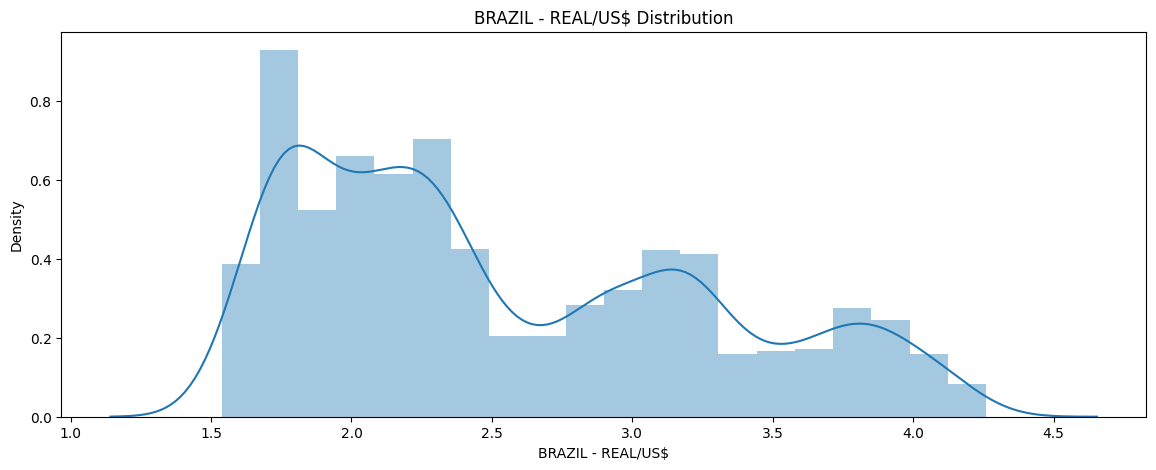

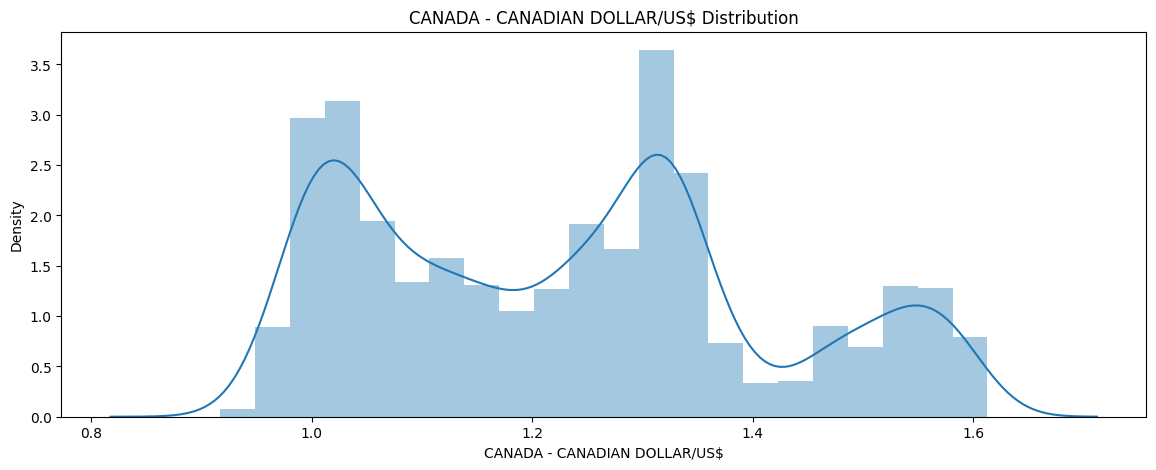

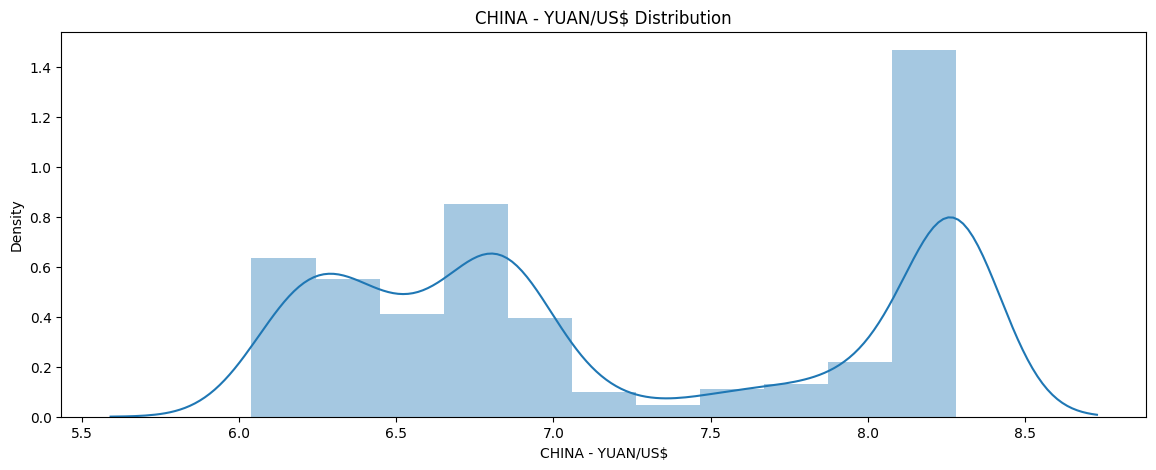

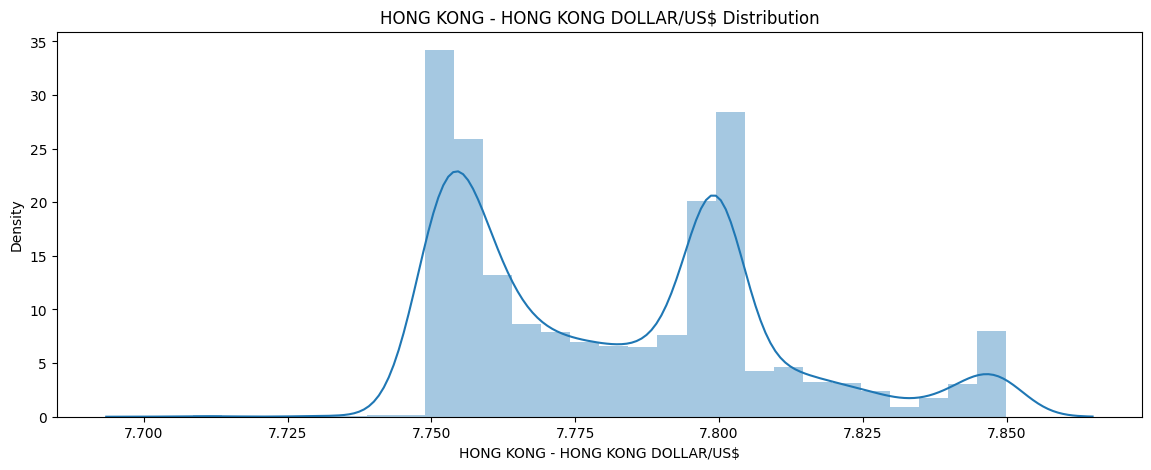

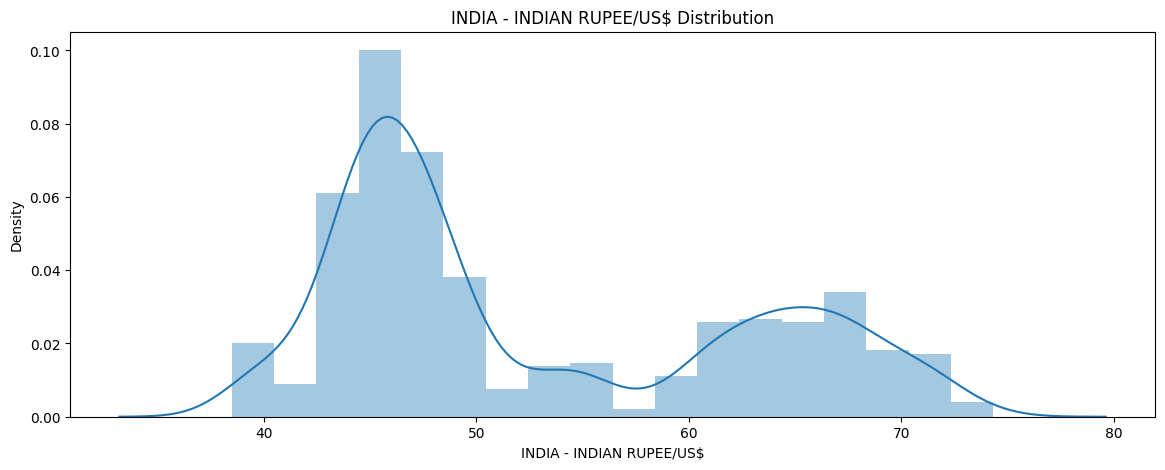

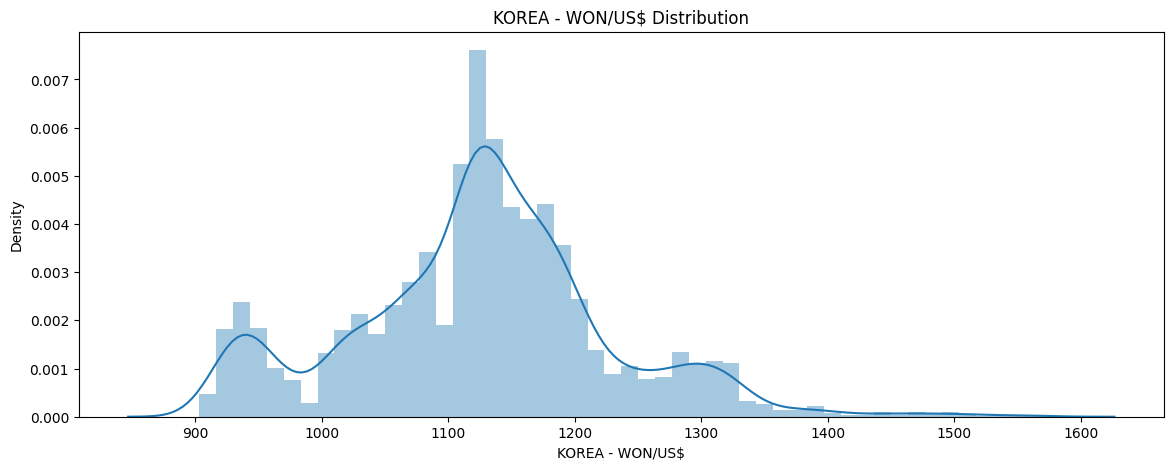

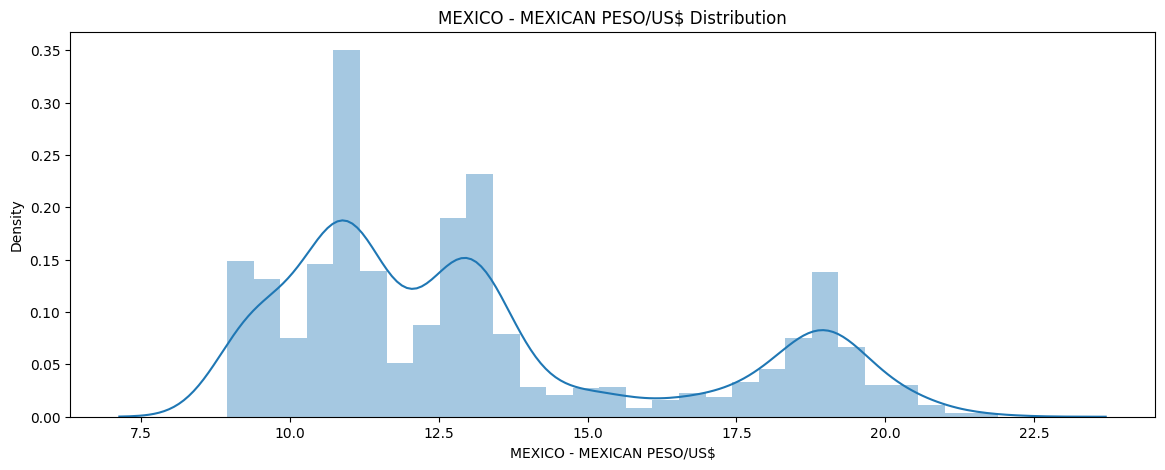

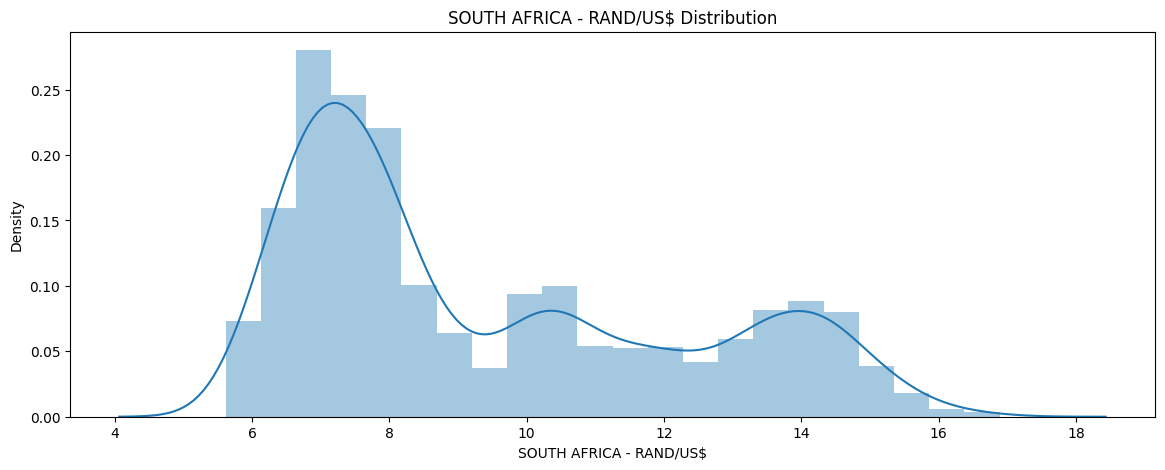

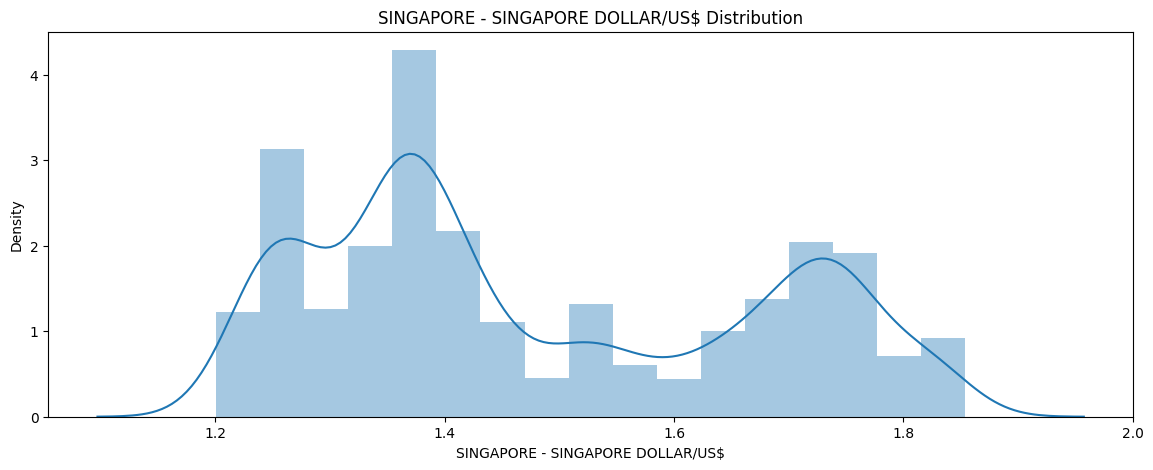

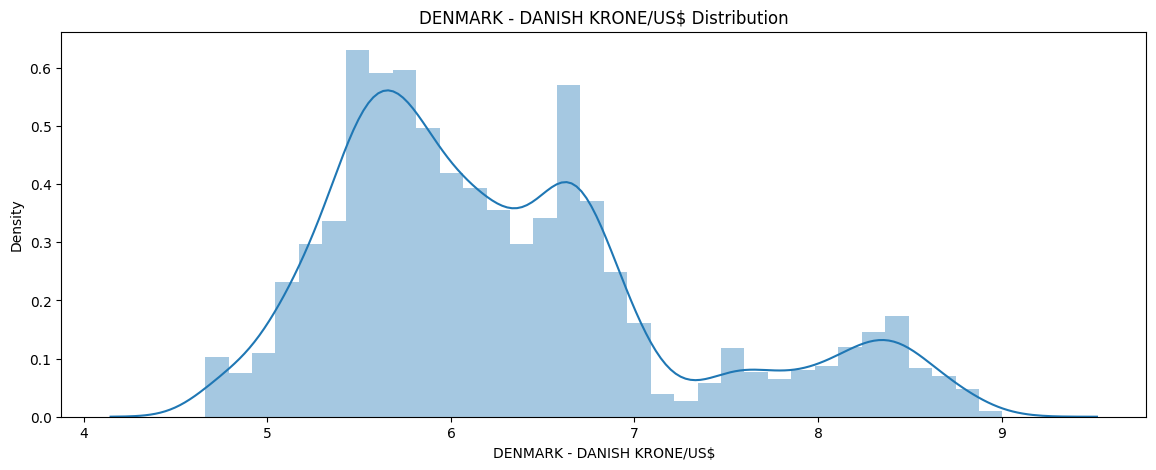

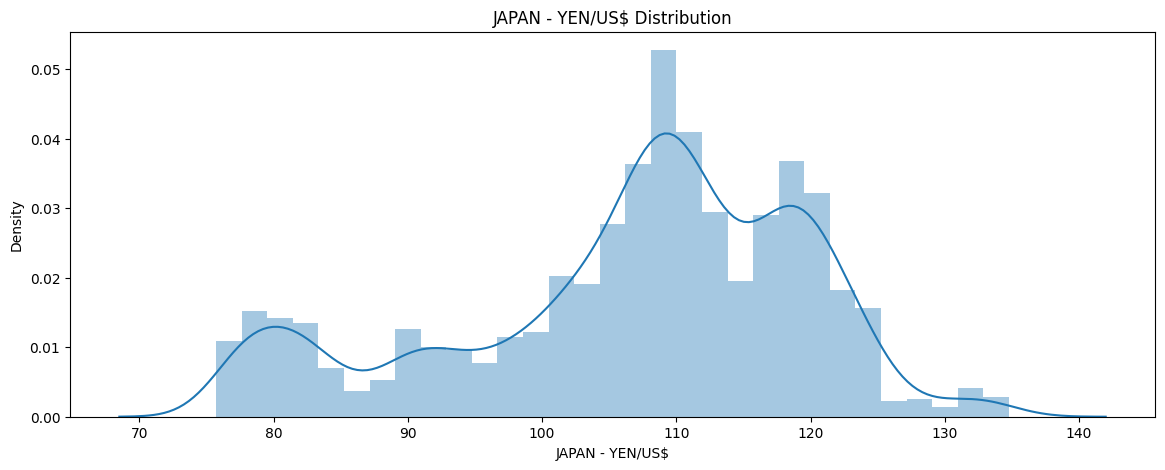

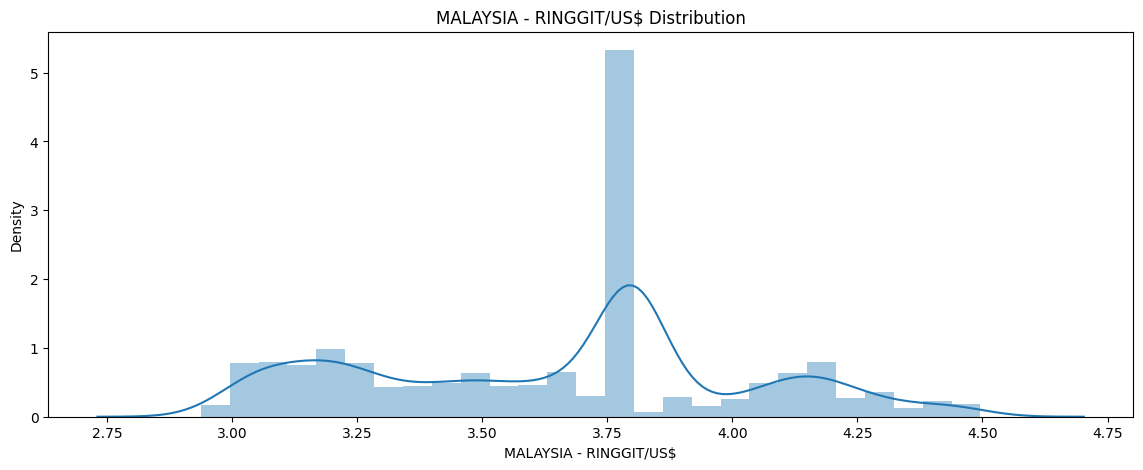

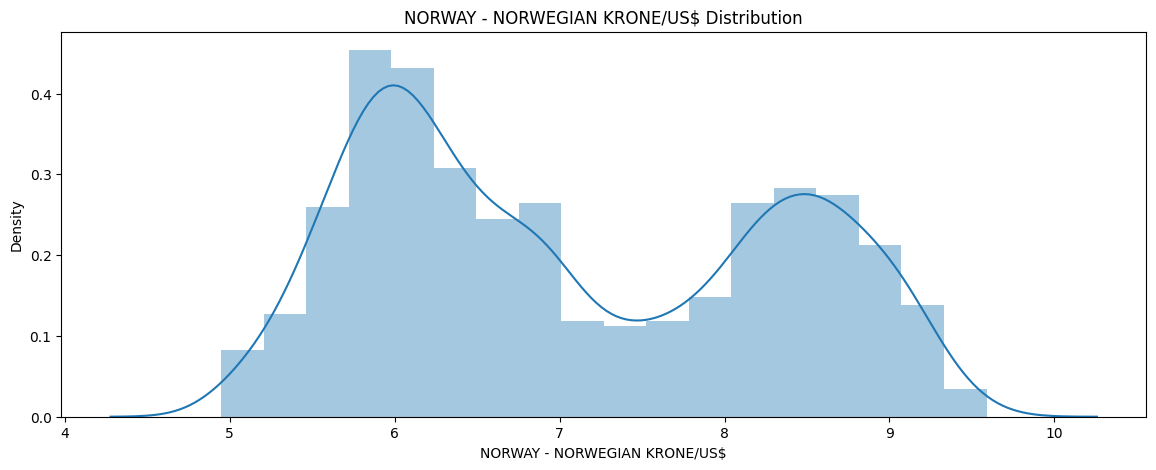

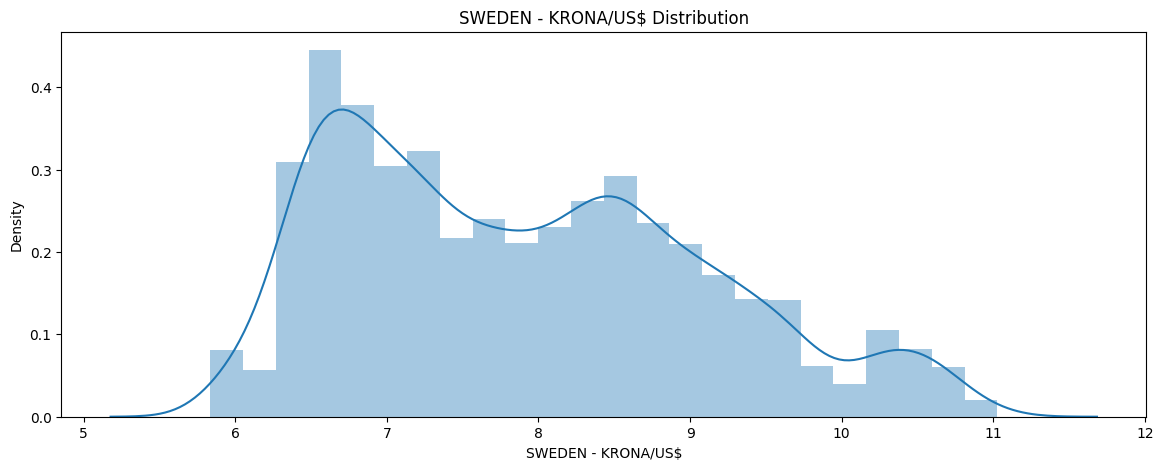

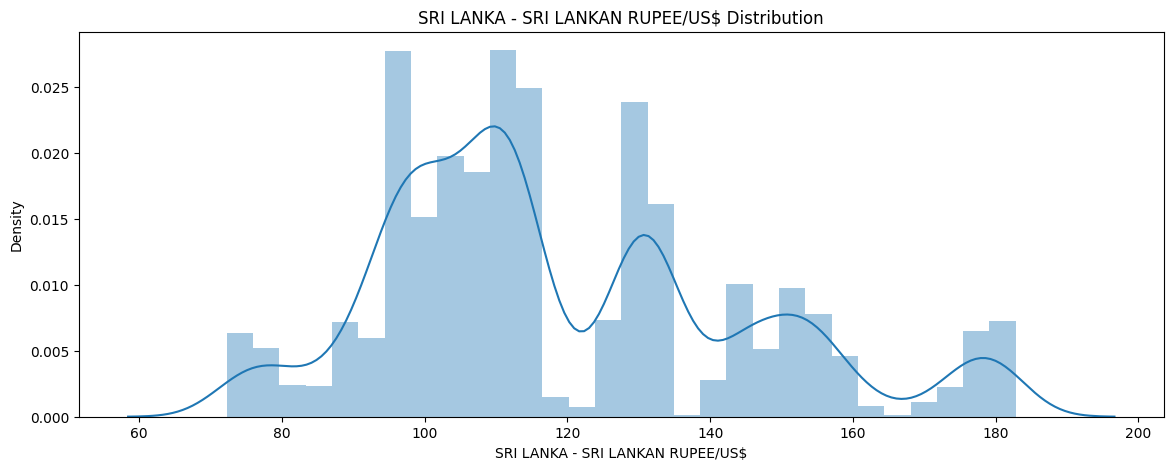

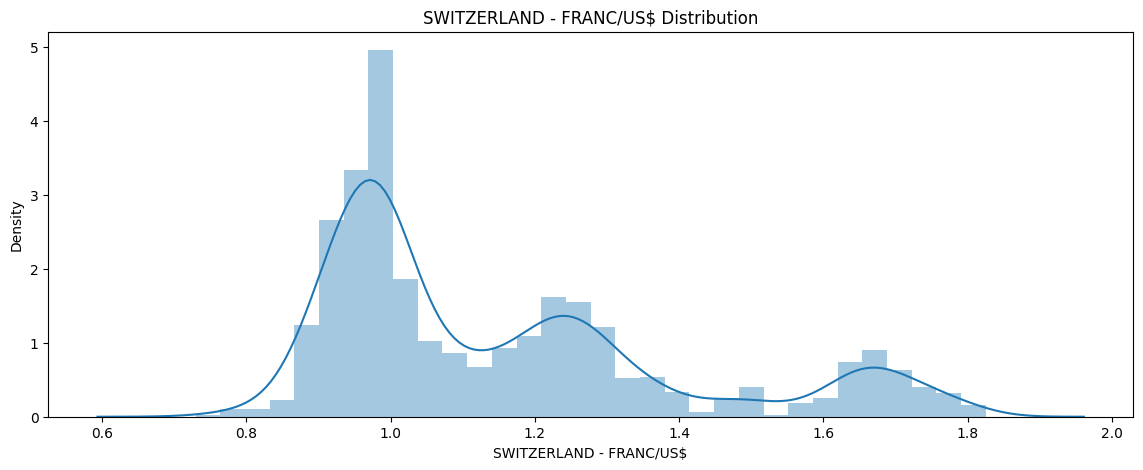

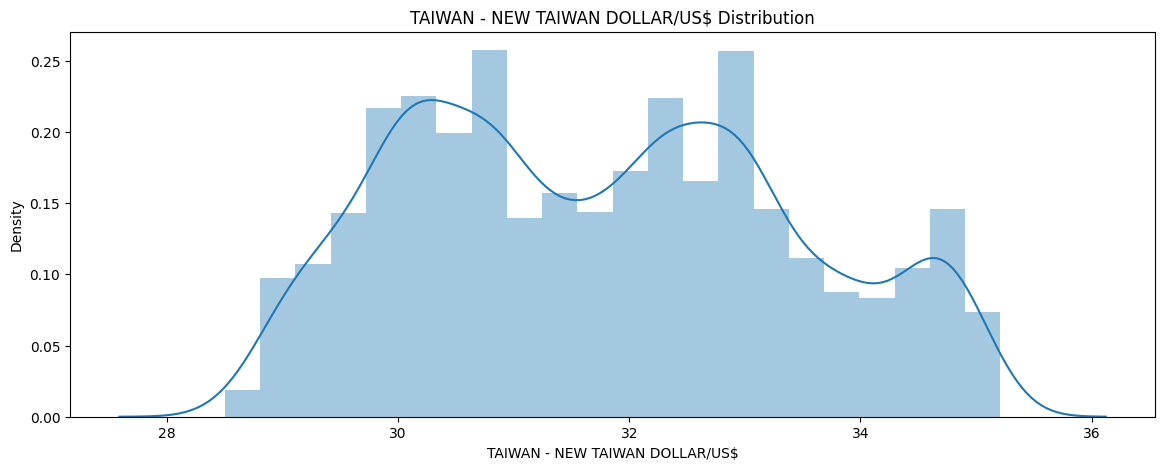

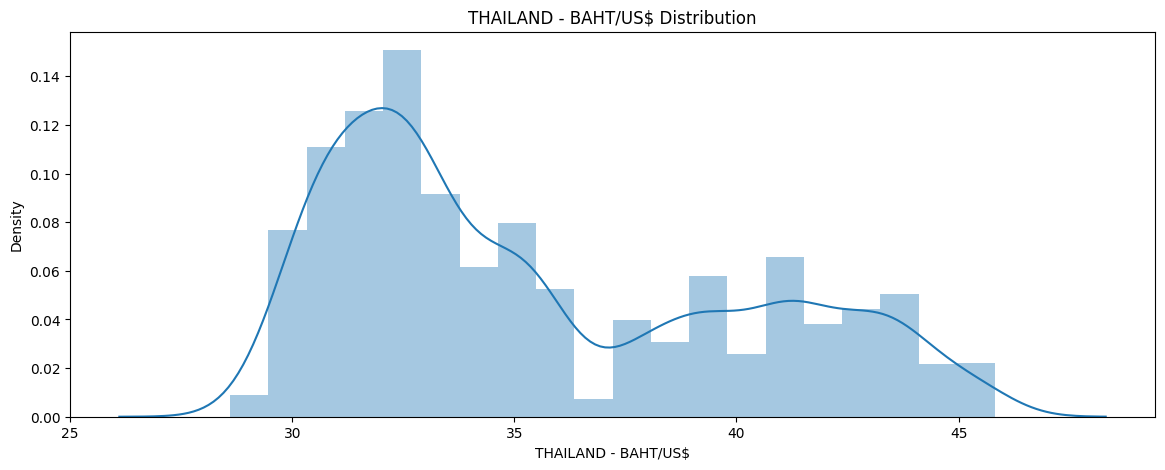

In [ ]:
# Plot the distribution of the values in the currency columns for all countries
for column in df_cleaned.columns:
    if column != 'Time Serie':  # Skip the datetime column
        plt.figure(figsize=(14, 5))
        sns.distplot(df_cleaned[column])
        plt.title(f'{column} Distribution')

In [ ]:
results = {}
for column in df_cleaned.loc[:, df_cleaned.columns != 'Time Serie']:
    time_series = df_cleaned[column]

    # Skip constant series (ADF test cannot process constant data)
    if time_series.nunique() > 1:
        adf_result = adfuller(time_series)
        results[column] = {
            'ADF Test Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Critical Values': adf_result[4]
        }
    else:
        results[column] = 'Skipped (constant series)'

# Display results
for column, result in results.items():
    print(f"Results for {column}:")
    if isinstance(result, dict):
        print(f"ADF Test Statistic: {result['ADF Test Statistic']}")
        print(f"p-value: {result['p-value']}")
        print(f"Critical Values: {result['Critical Values']}")
        if result['p-value'] <= 0.05:
            print("Stationary: Yes (Reject null hypothesis)")
        else:
            print("Stationary: No (Fail to reject null hypothesis)")
    else:
        print(result)
    print("-" * 50)

Results for AUSTRALIA - AUSTRALIAN DOLLAR/US$:
ADF Test Statistic: -1.6492898014115387
p-value: 0.45741084071010885
Critical Values: {'1%': np.float64(-3.43166220814716), '5%': np.float64(-2.862119853748156), '10%': np.float64(-2.567078656914853)}
Stationary: No (Fail to reject null hypothesis)
--------------------------------------------------
Results for EURO AREA - EURO/US$:
ADF Test Statistic: -1.6121172139020798
p-value: 0.4768642833774831
Critical Values: {'1%': np.float64(-3.431656179743224), '5%': np.float64(-2.8621171904320923), '10%': np.float64(-2.5670772391276855)}
Stationary: No (Fail to reject null hypothesis)
--------------------------------------------------
Results for NEW ZEALAND - NEW ZELAND DOLLAR/US$:
ADF Test Statistic: -1.7173067731548037
p-value: 0.4222182887251904
Critical Values: {'1%': np.float64(-3.4316608928957413), '5%': np.float64(-2.862119272677694), '10%': np.float64(-2.5670783475882715)}
Stationary: No (Fail to reject null hypothesis)
-----------------

In [ ]:
# #save the cleaned data
df_cleaned.to_csv('df_Prophet_Autots.csv', index=False)

# **Making the Data Stationary by removing trends and seasonality to give each column a constant mean and variance over time**

In [ ]:
# Apply .diff() only to numeric currency columns
df_daily = df_cleaned.copy()
numeric_columns = df_cleaned.select_dtypes(include=['float', 'int']).columns
df_daily[numeric_columns] = df_cleaned[numeric_columns].diff()

In [ ]:
#check if .diff created empty rows
df_daily.isnull().sum()

AUSTRALIA - AUSTRALIAN DOLLAR/US$            1
EURO AREA - EURO/US$                         1
NEW ZEALAND - NEW ZELAND DOLLAR/US$          1
UNITED KINGDOM - UNITED KINGDOM POUND/US$    1
BRAZIL - REAL/US$                            1
CANADA - CANADIAN DOLLAR/US$                 1
CHINA - YUAN/US$                             1
HONG KONG - HONG KONG DOLLAR/US$             1
INDIA - INDIAN RUPEE/US$                     1
KOREA - WON/US$                              1
MEXICO - MEXICAN PESO/US$                    1
SOUTH AFRICA - RAND/US$                      1
SINGAPORE - SINGAPORE DOLLAR/US$             1
DENMARK - DANISH KRONE/US$                   1
JAPAN - YEN/US$                              1
MALAYSIA - RINGGIT/US$                       1
NORWAY - NORWEGIAN KRONE/US$                 1
SWEDEN - KRONA/US$                           1
SRI LANKA - SRI LANKAN RUPEE/US$             1
SWITZERLAND - FRANC/US$                      1
TAIWAN - NEW TAIWAN DOLLAR/US$               1
THAILAND - BAHT/US$                          1
dtype: int64

In [ ]:
# Drop NaN rows created by .diff()
df_daily = df_daily.dropna()

In [ ]:
# Add debug print
print("Numeric columns used:", numeric_columns.tolist())

Numeric columns used: ['AUSTRALIA - AUSTRALIAN DOLLAR/US$', 'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$', 'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$', 'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$', 'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$', 'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$', 'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$', 'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$', 'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$', 'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$', 'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$', 'THAILAND - BAHT/US$']


In [ ]:
# Print results
print('Count of daily First Difference:', df_daily.shape[0])
df_daily.head()

Count of daily First Difference: 5014


AUSTRALIA - AUSTRALIAN DOLLAR/US$  EURO AREA - EURO/US$  \
Time Serie                                                            
2000-01-04                             0.0067               -0.0147   
2000-01-05                             0.0028               -0.0024   
2000-01-06                             0.0024                0.0010   
2000-01-07                            -0.0019                0.0028   
2000-01-10                            -0.0030                0.0040   

            NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
Time Serie                                        
2000-01-04                               0.0205   
2000-01-05                               0.0101   
2000-01-06                               0.0097   
2000-01-07                              -0.0056   
2000-01-10                              -0.0030   

            UNITED KINGDOM - UNITED KINGDOM POUND/US$  BRAZIL - REAL/US$  \
Time Serie                                                                 
2000-01-04                                    -0.0037             0.0355   
2000-01-05                                    -0.0017             0.0155   
2000-01-06                                    -0.0022            -0.0160   
2000-01-07                                     0.0034            -0.0090   
2000-01-10                                     0.0003            -0.0120   

            CANADA - CANADIAN DOLLAR/US$  CHINA - YUAN/US$  \
Time Serie                                                   
2000-01-04                        0.0053            0.0001   
2000-01-05                        0.0000           -0.0001   
2000-01-06                        0.0053           -0.0001   
2000-01-07                       -0.0066           -0.0003   
2000-01-10                        0.0063            0.0000   

            HONG KONG - HONG KONG DOLLAR/US$  INDIA - INDIAN RUPEE/US$  \
Time Serie                                                               
2000-01-04                            0.0010                       0.0   
2000-01-05                            0.0005                       0.0   
2000-01-06                            0.0005                       0.0   
2000-01-07                           -0.0002                       0.0   
2000-01-10                            0.0002                       0.0   

            KOREA - WON/US$  ...  SINGAPORE - SINGAPORE DOLLAR/US$  \
Time Serie                   ...                                     
2000-01-04             -5.5  ...                           -0.0028   
2000-01-05             12.5  ...                            0.0025   
2000-01-06             11.5  ...                            0.0095   
2000-01-07             -8.5  ...                           -0.0030   
2000-01-10             -4.5  ...                           -0.0007   

            DENMARK - DANISH KRONE/US$  JAPAN - YEN/US$  \
Time Serie                                                
2000-01-04                     -0.1110             1.39   
2000-01-05                     -0.0100             0.68   
2000-01-06                      0.0045             1.42   
2000-01-07                      0.0160            -0.02   
2000-01-10                      0.0255             0.11   

            MALAYSIA - RINGGIT/US$  NORWAY - NORWEGIAN KRONE/US$  \
Time Serie                                                         
2000-01-04                     0.0                        -0.030   
2000-01-05                     0.0                         0.001   
2000-01-06                     0.0                         0.005   
2000-01-07                     0.0                         0.026   
2000-01-10                     0.0                         0.058   

            SWEDEN - KRONA/US$  SRI LANKA - SRI LANKAN RUPEE/US$  \
Time Serie                                                         
2000-01-04             -0.0830                              0.35   
2000-01-05             -0.0070                              0.30   
2000-01-06     

In [ ]:
# Initialize results dictionary
results1 = {}

# Iterate over all columns except "Time Serie"
for column in df_daily.columns[df_daily.columns != 'Time Serie']:
    time_series = df_daily[column]

    # Skip constant series (ADF test cannot process constant data)
    if time_series.nunique() > 1:
        adf_result = adfuller(time_series.dropna())  # Drop NaN values before ADF test
        results1[column] = {
            'ADF Test Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Critical Values': adf_result[4]
        }
    else:
        results1[column] = 'Skipped (constant series)'

# Display results
for column, result in results1.items():
    print(f"Results for {column}:")
    if isinstance(result, dict):
        print(f"ADF Test Statistic: {result['ADF Test Statistic']}")
        print(f"p-value: {result['p-value']}")
        print(f"Critical Values: {result['Critical Values']}")
        if result['p-value'] <= 0.05:
            print("Stationary: Yes (Reject null hypothesis)")
        else:
            print("Stationary: No (Fail to reject null hypothesis)")
    else:
        print(result)
    print("-" * 50)

Results for AUSTRALIA - AUSTRALIAN DOLLAR/US$:
ADF Test Statistic: -12.143007065285397
p-value: 1.634596039367894e-22
Critical Values: {'1%': np.float64(-3.43166220814716), '5%': np.float64(-2.862119853748156), '10%': np.float64(-2.567078656914853)}
Stationary: Yes (Reject null hypothesis)
--------------------------------------------------
Results for EURO AREA - EURO/US$:
ADF Test Statistic: -31.905263469582184
p-value: 0.0
Critical Values: {'1%': np.float64(-3.431656179743224), '5%': np.float64(-2.8621171904320923), '10%': np.float64(-2.5670772391276855)}
Stationary: Yes (Reject null hypothesis)
--------------------------------------------------
Results for NEW ZEALAND - NEW ZELAND DOLLAR/US$:
ADF Test Statistic: -15.330616541031318
p-value: 3.9504284944553753e-28
Critical Values: {'1%': np.float64(-3.4316608928957413), '5%': np.float64(-2.862119272677694), '10%': np.float64(-2.5670783475882715)}
Stationary: Yes (Reject null hypothesis)
-----------------------------------------------

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5015 entries, 2000-01-03 to 2019-12-31
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5015 non-null   float64
 1   EURO AREA - EURO/US$                       5015 non-null   float64
 2   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5015 non-null   float64
 3   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5015 non-null   float64
 4   BRAZIL - REAL/US$                          5015 non-null   float64
 5   CANADA - CANADIAN DOLLAR/US$               5015 non-null   float64
 6   CHINA - YUAN/US$                           5015 non-null   float64
 7   HONG KONG - HONG KONG DOLLAR/US$           5015 non-null   float64
 8   INDIA - INDIAN RUPEE/US$                   5015 non-null   float64
 9   KOREA - WON/US$                            5015 non-null   float64
 10  MEXICO

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5014 entries, 2000-01-04 to 2019-12-31
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5014 non-null   float64
 1   EURO AREA - EURO/US$                       5014 non-null   float64
 2   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5014 non-null   float64
 3   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5014 non-null   float64
 4   BRAZIL - REAL/US$                          5014 non-null   float64
 5   CANADA - CANADIAN DOLLAR/US$               5014 non-null   float64
 6   CHINA - YUAN/US$                           5014 non-null   float64
 7   HONG KONG - HONG KONG DOLLAR/US$           5014 non-null   float64
 8   INDIA - INDIAN RUPEE/US$                   5014 non-null   float64
 9   KOREA - WON/US$                            5014 non-null   float64
 10  MEXICO

# **Plot of the stationary data and the non-stationary data to show speed of decay and successfully making the data stationary**

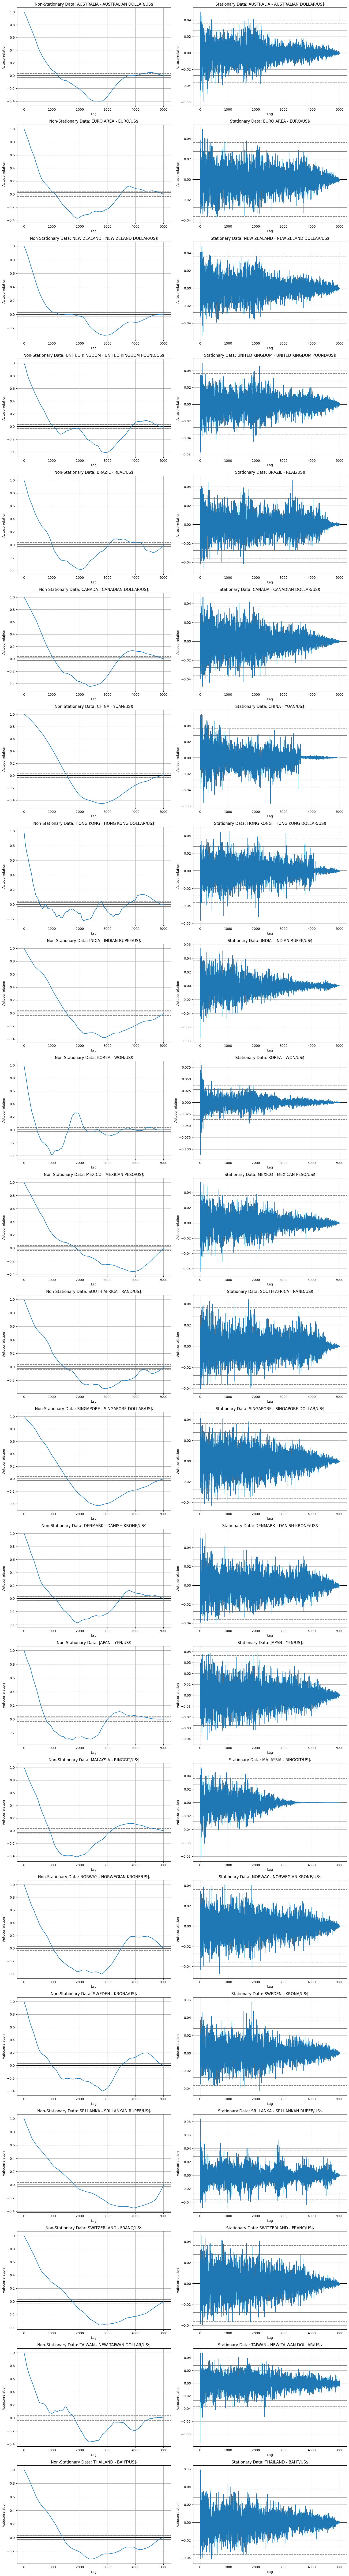

In [ ]:
# Exclude the Timerie column during plotting
columns_to_plot = [col for col in df_cleaned.columns if col != 'Timerie']

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(15, 5 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    # Non-stationary data plot
    autocorrelation_plot(df_cleaned[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Non-Stationary Data: {column}')

    # Stationary data plot
    autocorrelation_plot(df_daily[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Stationary Data: {column}')

plt.tight_layout()
plt.savefig('FX_Stationary_vs_NonStationary.png')
plt.show()